In [1]:
#imorting Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading Dataset
dataset=pd.read_csv('advertising.csv')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
#less impact columns are dropped
dataset=dataset.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
dataset

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


In [4]:
#the impact between the columns is measured
dataset.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


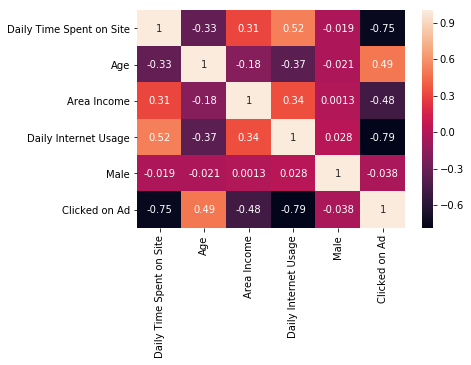

In [5]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [6]:
#verifying whether any null values present or not
dataset.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Male                        False
Clicked on Ad               False
dtype: bool

In [7]:
#for slicing of independent and dependent variables
x=dataset.iloc[:,:-1].values 
x

array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02,
        0.000000e+00],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02,
        1.000000e+00],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02,
        0.000000e+00],
       ...,
       [5.163000e+01, 5.100000e+01, 4.241572e+04, 1.203700e+02,
        1.000000e+00],
       [5.555000e+01, 1.900000e+01, 4.192079e+04, 1.879500e+02,
        0.000000e+00],
       [4.501000e+01, 2.600000e+01, 2.987580e+04, 1.783500e+02,
        0.000000e+00]])

In [8]:
y=dataset.iloc[:,-1:].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [9]:
#to check whether any duplicate records are present or not
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [10]:
#we split the dataset for testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02,
        1.000000e+00],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02,
        0.000000e+00],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02,
        1.000000e+00],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02,
        1.000000e+00],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02,
        1.000000e+00],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02,
        0.000000e+00]])

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.53448142, -0.92842669,  0.91865168,  0.84125985,  1.06458129],
       [-0.82619679,  1.11581557,  0.60803575, -1.2505932 , -0.93933644],
       [-0.52911642,  1.45652261,  0.928236  , -1.01277338,  1.06458129],
       ...,
       [ 0.57647379, -1.15556472,  0.03912084,  1.2969858 ,  1.06458129],
       [ 0.87104715, -0.58771965,  0.39953429,  1.27707211,  1.06458129],
       [-1.42161102, -0.24701261, -0.86108765, -1.09723489, -0.93933644]])

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\GECIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\GECIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict)

0.98

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[107,   1],
       [  3,  89]], dtype=int64)

In [16]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.9790660225442834

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

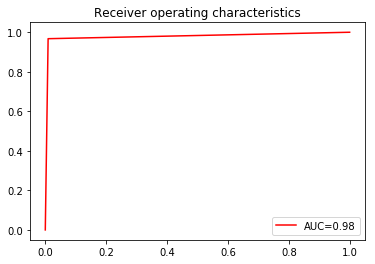

In [17]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='red')
plt.legend()
plt.plot

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier1.fit(x_train,y_train)

C:\Users\GECIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_predict1=classifier1.predict(x_test)
y_predict1

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict1)

0.965

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict1)
cm

array([[108,   0],
       [  7,  85]], dtype=int64)

In [22]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict1)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.9619565217391304

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

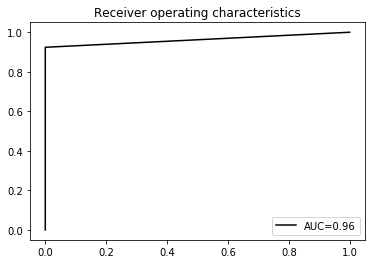

In [23]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='black')
plt.legend()
plt.plot

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)#n_esti represents no of decision trees in forest
classifier2.fit(x_train,y_train)

C:\Users\GECIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
y_predict2=classifier2.predict(x_test)
y_predict2

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict2)

0.965

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict2)
cm

array([[106,   2],
       [  5,  87]], dtype=int64)

In [28]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict2)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.9635668276972624

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

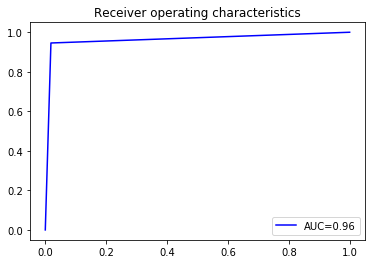

In [29]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='blue')
plt.legend()
plt.plot

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
y_predict3=classifier3.predict(x_test)
y_predict3

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict3)

0.945

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict3)
cm

array([[101,   7],
       [  4,  88]], dtype=int64)

In [34]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict3)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.9458534621578101

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

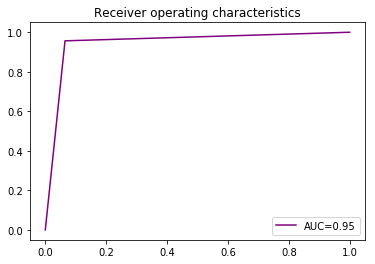

In [35]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='purple')
plt.legend()
plt.plot

# SVM

In [36]:
from sklearn.svm import SVC
classifier4=SVC(kernel='rbf')
classifier4.fit(x_train,y_train)

C:\Users\GECIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
y_predict4=classifier4.predict(x_test)
y_predict4

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score#to find accurate in feature scaling accuracy_score is used
accuracy_score(y_test,y_predict4)

0.965

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict4)
cm

array([[106,   2],
       [  5,  87]], dtype=int64)

In [40]:
import sklearn.metrics as metrics
fpr,tpr,threshold =metrics.roc_curve(y_test,y_predict4)
roc_auc=metrics.auc(fpr,tpr)#auc specifies at what point curve is inclined to 1
roc_auc

0.9635668276972624

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

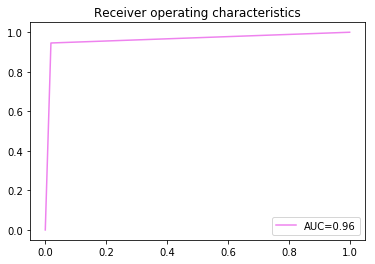

In [41]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='violet')
plt.legend()
plt.plot

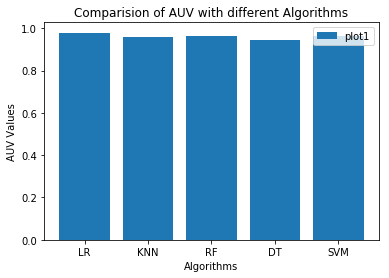

In [42]:
x=["LR","KNN","RF","DT","SVM"]
y=[0.9790,0.961,0.963,0.945,0.963]
plt.bar(x,y,label="plot1")
plt.xlabel("Algorithms")
plt.ylabel("AUV Values")
plt.title("Comparision of AUV with different Algorithms")
plt.legend()#used to identify multiple plots in graph which differentiates by colour
plt.show()